<a href="https://colab.research.google.com/github/Mouna876/MachineLearning/blob/main/Mini_projet_1_Bingo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jeu de Bingo:**

# 1. Comment jouer ?:

1. Chaque joueur reçoit une carte de Bingo avec une grille de numéros.

2. Un animateur tire aléatoirement des nombres et les annonce.

3. Les joueurs marquent les numéros annoncés sur leur carte.

4. Le jeu continue jusqu'à ce qu'un joueur remplisse une ligne complète sur sa carte (horizontale, verticale ou diagonale).

5. Le premier joueur à remplir une ligne crie "Bingo !" et remporte la partie.

6. Les cartes des joueurs sont vérifiées pour confirmer la victoire.

7. Le jeu peut se poursuivre avec de nouvelles cartes et de nouveaux tirages pour d'autres parties.

# 2. Modélisation Probabiliste

# 2.1.	Expérience Aléatoire et Espace Probabilisé:

Dans le contexte du jeu de Bingo :

1. **Expérience Aléatoire :** Chaque tour de jeu implique un tirage aléatoire d'un nombre par l'animateur. Chaque tirage est indépendant et aléatoire, sans influence des résultats précédents.

2. **Espace Probabilisé :** C'est l'ensemble de tous les résultats possibles pour chaque tirage. Dans le Bingo traditionnel, l'espace probabilisé comprend les nombres de 1 à 75, chaque nombre ayant une probabilité égale d'être tiré à chaque tour (\( \frac{1}{75} \)).

# 2.2.	Variables Aléatoires et Loi de Probabilité:

Dans le jeu de Bingo :

1. **Variables Aléatoires :** Elles représentent le nombre de cases cochées sur la carte d'un joueur à chaque tirage. Chaque tirage peut augmenter le nombre de cases cochées d'un joueur.

2. **Loi de Probabilité :** Dans un Bingo traditionnel, la loi de probabilité suit une distribution uniforme, ce qui signifie que chaque numéro a la même probabilité d'être tiré à chaque tour. Ainsi, la probabilité de cocher une case spécifique sur la carte d'un joueur est égale pour chaque case.

# 2.3.	Calcul de Probabilités et d'Espérance:

Dans le jeu de Bingo :

1. **Calcul de Probabilités :** Il détermine la probabilité pour un joueur de remplir une ligne complète sur sa carte à chaque tirage. Cela dépend du nombre de cases déjà cochées sur sa carte et du nombre total de cases restantes pour former une ligne.

2. **Calcul d'Espérance :** Cela représente le nombre moyen de tirages nécessaires pour qu'un joueur remplisse une ligne complète sur sa carte. Il est calculé en prenant en compte les probabilités de remplir une ligne sur chaque tirage et en les combinant pour obtenir une moyenne pondérée.

# 3. Code Python:

# 3.1 Insertion des paramètres de Bingo:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

nombre_tours = 75  # Nombre total de nombres dans le Bingo
nombre_appels = 30  # Nombre d'appels dans une partie de Bingo
probabilite_succes = nombre_appels / nombre_tours  # Probabilité d'appeler un numéro spécifique

rv_binomiale = binom(nombre_tours, probabilite_succes)
k_values = np.arange(0, nombre_appels + 1)

probabilites = rv_binomiale.pmf(k_values)

esperance = rv_binomiale.mean()
variance = rv_binomiale.var()
print("Espérance de la variable aléatoire binomiale :", esperance)
print("Variance de la variable aléatoire binomiale :", variance)


Espérance de la variable aléatoire binomiale : 30.0
Variance de la variable aléatoire binomiale : 18.0


## 3.2 Affichage:

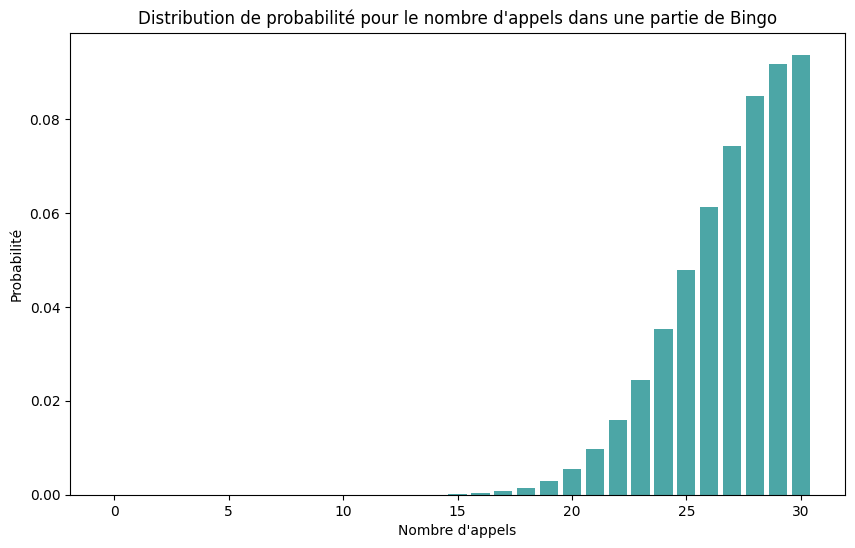

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(k_values, probabilites, color='teal', alpha=0.7)
plt.title('Distribution de probabilité pour le nombre d\'appels dans une partie de Bingo')
plt.xlabel('Nombre d\'appels')
plt.ylabel('Probabilité')
plt.show()

## 3.3 Essayez le jeu:



In [ ]:
import random

class Bingo:
    def __init__(self, num_players=1):
        # Initialisation de la classe avec le nombre de joueurs et les structures de données nécessaires
        self.num_players = num_players
        self.players = {i: [] for i in range(1, num_players + 1)}  # Dictionnaire pour stocker les cartes des joueurs
        self.called_numbers = set()  # Ensemble pour suivre les numéros déjà appelés

    # Génère aléatoirement une carte de Bingo pour un joueur en évitant les doublons
    def generate_card(self):
        card = []
        while len(card) < 25:  # Générer une carte avec 25 cases
            num = random.randint(1, 75)
            if num not in card:  # S'assurer qu'il n'y a pas de doublons
                card.append(num)
        return card

    # Affiche la carte d'un joueur donné dans la console
    def display_card(self, player):
        print("Carte du Joueur", player, ":")
        card = self.players[player]
        for i in range(0, 25, 5):
            print(card[i:i+5])

    # Vérifie si un joueur donné a rempli sa carte en parcourant les lignes, colonnes et diagonales de sa carte
    def check_card(self, player):
        card = self.players[player]
        for i in range(0, 25, 5):  # Vérifier les lignes
            if all(num in self.called_numbers for num in card[i:i+5]):
                return True
        for i in range(5):  # Vérifier les colonnes
            if all(card[j+i] in self.called_numbers for j in range(0, 25, 5)):
                return True
        # Vérifier les diagonales
        if all(card[i] in self.called_numbers for i in range(0, 25, 6)) or \
           all(card[i] in self.called_numbers for i in range(4, 21, 4)):
            return True
        return False

    # Simule le déroulement du jeu en générant les cartes pour chaque joueur, les affichant, appelant les numéros aléatoirement et vérifiant si un joueur a gagné à chaque tour
    def play(self):
        # Générer les cartes pour chaque joueur
        for player in range(1, self.num_players + 1):
            self.players[player] = self.generate_card()

        # Afficher les cartes générées pour chaque joueur
        print("Cartes générées pour chaque joueur:")
        for player in range(1, self.num_players + 1):
            self.display_card(player)
            print()

        # Boucle principale du jeu
        while True:
            called_number = random.randint(1, 75)  # Simuler un numéro de Bingo appelé
            print("Numéro appelé:", called_number)
            self.called_numbers.add(called_number)  # Ajouter le numéro appelé à l'ensemble des numéros déjà appelés

            # Vérifier si un joueur a gagné
            for player in range(1, self.num_players + 1):
                if self.check_card(player):
                    print("Le Joueur", player, "gagne!")  # Afficher le joueur gagnant
                    return  # Sortir de la méthode play() si un joueur a gagné

# Lancer le jeu
if __name__ == "__main__":
    num_players = int(input("Entrez le nombre de joueurs: "))  # Demander à l'utilisateur le nombre de joueurs
    game = Bingo(num_players)  # Créer une instance du jeu de Bingo avec le nombre de joueurs spécifié
    game.play()  # Démarrer le jeu


Entrez le nombre de joueurs: 2
Cartes générées pour chaque joueur:
Carte du Joueur 1 :
[53, 50, 34, 74, 7]
[58, 15, 31, 65, 46]
[67, 64, 38, 68, 28]
[48, 62, 72, 26, 61]
[20, 63, 70, 6, 41]

Carte du Joueur 2 :
[1, 68, 46, 31, 19]
[13, 54, 30, 66, 21]
[6, 5, 33, 38, 48]
[64, 24, 65, 71, 50]
[4, 41, 23, 42, 37]

Numéro appelé: 10
Numéro appelé: 12
Numéro appelé: 55
Numéro appelé: 35
Numéro appelé: 72
Numéro appelé: 19
Numéro appelé: 16
Numéro appelé: 56
Numéro appelé: 29
Numéro appelé: 23
Numéro appelé: 73
Numéro appelé: 20
Numéro appelé: 37
Numéro appelé: 40
Numéro appelé: 54
Numéro appelé: 65
Numéro appelé: 64
Numéro appelé: 54
Numéro appelé: 42
Numéro appelé: 44
Numéro appelé: 72
Numéro appelé: 9
Numéro appelé: 32
Numéro appelé: 67
Numéro appelé: 11
Numéro appelé: 7
Numéro appelé: 37
Numéro appelé: 45
Numéro appelé: 44
Numéro appelé: 56
Numéro appelé: 35
Numéro appelé: 49
Numéro appelé: 45
Numéro appelé: 74
Numéro appelé: 1
Numéro appelé: 11
Numéro appelé: 67
Numéro appelé: 75
Numéro